<a href="https://colab.research.google.com/github/emilia-uncc/Assignment1/blob/main/Assignment1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
file_path = '/content/drive/My Drive/DataSets/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
#sample.head()

In [45]:

# Separate features and labels
X_1 = sample.values[:, 0]  # get input values from first column -- X_1 is a list here
X_2 = sample.values[:, 1]  # get input values from first column -- X_2 is a list here
X_3 = sample.values[:, 2]  # get input values from first column -- X_3 is a list here
Y = sample.values[:, 3]  # get output values from second column -- Y is the list here
m = len(Y)  # Number of training examples
n = len(X_1)  # Number of training examples


# Display first 5 records and the total number of training examples
print('X_1 = ', X_1[: 5])
print('Y = ', Y[: 5])
print('m = ', m)
print('n = ', n)

X_1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100


In [46]:
#print('X_1 = ', X_1[: 100])
#print('X_2 = ', X_2[: 100])
#print('X_3 = ', X_3[: 100])
#print('Y = ', Y[: 100])

In [47]:
from IPython.display import display
display(sample)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


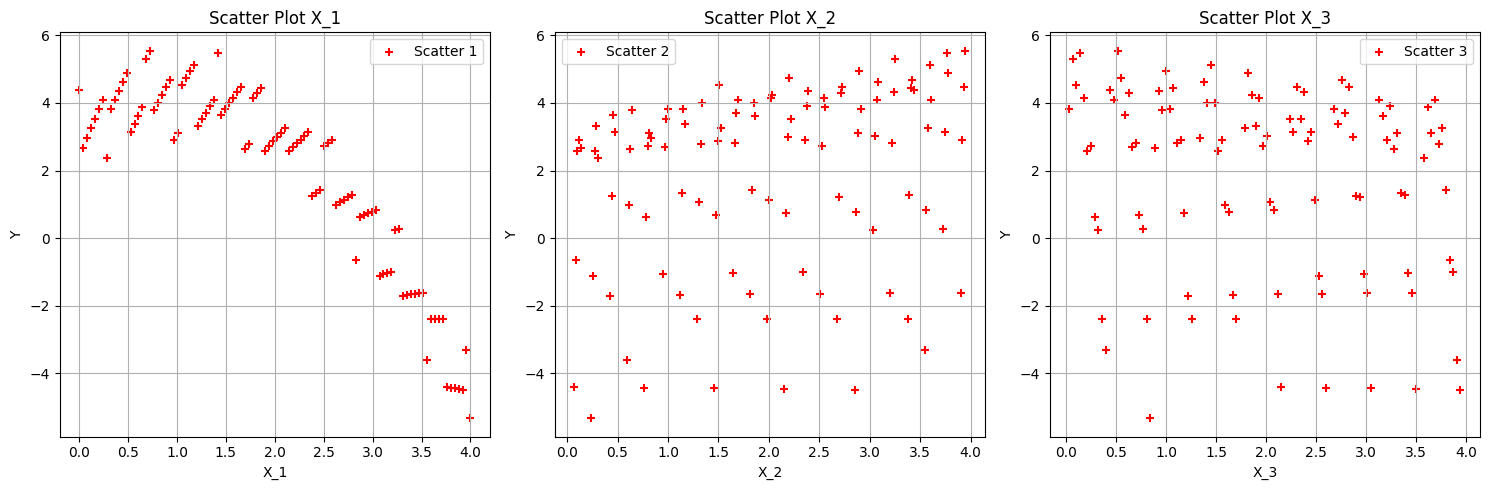

In [48]:


# Create a figure with three subplots in a single row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first scatter plot on the first subplot
ax1.scatter(X_1, Y,color="red", marker='+', label='Scatter 1')
ax1.set_title('Scatter Plot X_1')
ax1.set_xlabel('X_1')
ax1.set_ylabel('Y')
ax1.grid(True)
ax1.legend()

# Plot the first scatter plot on the first subplot
ax2.scatter(X_2, Y,color="red", marker='+', label='Scatter 2')
ax2.set_title('Scatter Plot X_2')
ax2.set_xlabel('X_2')
ax2.set_ylabel('Y')
ax2.grid(True)
ax2.legend()

# Plot the first scatter plot on the first subplot
ax3.scatter(X_3, Y,color="red", marker='+', label='Scatter 3')
ax3.set_title('Scatter Plot X_3')
ax3.set_xlabel('X_3')
ax3.set_ylabel('Y')
ax3.grid(True)
ax3.legend()
# Optionally, adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()




In [49]:
#initalizing X_0 Matrix
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [50]:
#from array to matrix reshape X_1
X_1 = X_1.reshape(m, 1)
X_1[:10]

array([[0.        ],
       [0.04040404],
       [0.08080808],
       [0.12121212],
       [0.16161616],
       [0.2020202 ],
       [0.24242424],
       [0.28282828],
       [0.32323232],
       [0.36363636]])

In [51]:
#from array to matrix reshape X_2
X_2 = X_2.reshape(m, 1)
X_2[:10]

array([[3.44      ],
       [0.1349495 ],
       [0.82989899],
       [1.52484848],
       [2.21979798],
       [2.91474747],
       [3.60969697],
       [0.30464646],
       [0.99959596],
       [1.69454546]])

In [52]:
#from array to matrix reshape
X_3 = X_3.reshape(m, 1)
X_3[:10]

array([[0.44      ],
       [0.88848485],
       [1.3369697 ],
       [1.78545454],
       [2.23393939],
       [2.68242424],
       [3.13090909],
       [3.57939394],
       [0.02787879],
       [0.47636364]])

In [53]:
X_01 = np.hstack((X_0, X_1))
X_01[:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [54]:
X_02 = np.hstack((X_0, X_2))
X_02[:5]

array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [55]:
X_03 = np.hstack((X_0, X_3))
X_03[:5]

array([[1.        , 0.44      ],
       [1.        , 0.88848485],
       [1.        , 1.3369697 ],
       [1.        , 1.78545454],
       [1.        , 2.23393939]])

In [56]:
theta = np.zeros(2)
theta

array([0., 0.])

In [57]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta) #x-matrix * theta-matrix -> h(x)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [58]:
# Lets compute the cost for theta values
cost_01 = compute_cost(X_01, Y, theta)
cost_02 = compute_cost(X_02, Y, theta)
cost_03 = compute_cost(X_03, Y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost_01)
print('The cost for given values of theta_0 and theta_1 =', cost_02)
print('The cost for given values of theta_0 and theta_1 =', cost_03)

The cost for given values of theta_0 and theta_1 = 5.524438459196242
The cost for given values of theta_0 and theta_1 = 5.524438459196242
The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [59]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [60]:
theta_01 = [0., 0.]
theta_02 = [0., 0.]
theta_03 = [0., 0.]
iterations_01 = 300
iterations_02 = 100
iterations_03 = 500
alpha_01 = 0.1
alpha_02 = 0.1
alpha_03 = 0.1

In [61]:
theta_01, cost_history_01 = gradient_descent(X_01, Y, theta_01, alpha_01, iterations_01)
print('Final value of theta_01 =', theta_01)
print('cost_history =', cost_history_01)

theta_02, cost_history_02 = gradient_descent(X_02, Y, theta_02, alpha_02, iterations_02)
print('Final value of theta_02 =', theta_02)
print('cost_history =', cost_history_02)

theta_03, cost_history_03 = gradient_descent(X_03, Y, theta_03, alpha_03, iterations_03)
print('Final value of theta_03 =', theta_03)
print('cost_history =', cost_history_03)

Final value of theta_01 = [ 5.92092354 -2.03560232]
cost_history = [5.16999006 4.96338989 4.7855721  4.61848888 4.45916697 4.30689303
 4.16130255 4.02209431 3.88898736 3.76171412 3.64001888 3.52365717
 3.41239525 3.30600959 3.2042865  3.10702162 3.01401956 2.9250935
 2.8400648  2.75876264 2.68102372 2.60669185 2.53561773 2.46765857
 2.40267785 2.34054503 2.28113532 2.22432934 2.170013   2.11807718
 2.06841755 2.02093435 1.9755322  1.93211988 1.89061019 1.85091975
 1.81296882 1.77668116 1.74198388 1.70880727 1.6770847  1.64675243
 1.61774953 1.59001774 1.56350135 1.53814709 1.51390403 1.49072347
 1.46855885 1.44736563 1.42710125 1.40772499 1.38919794 1.37148287
 1.3545442  1.33834789 1.32286143 1.30805369 1.29389492 1.28035669
 1.2674118  1.25503425 1.24319917 1.23188278 1.22106236 1.21071616
 1.2008234  1.19136421 1.1823196  1.17367137 1.16540218 1.1574954
 1.14993515 1.14270624 1.13579415 1.129185   1.1228655  1.11682297
 1.11104527 1.10552079 1.10023842 1.09518757 1.09035808 1.085740

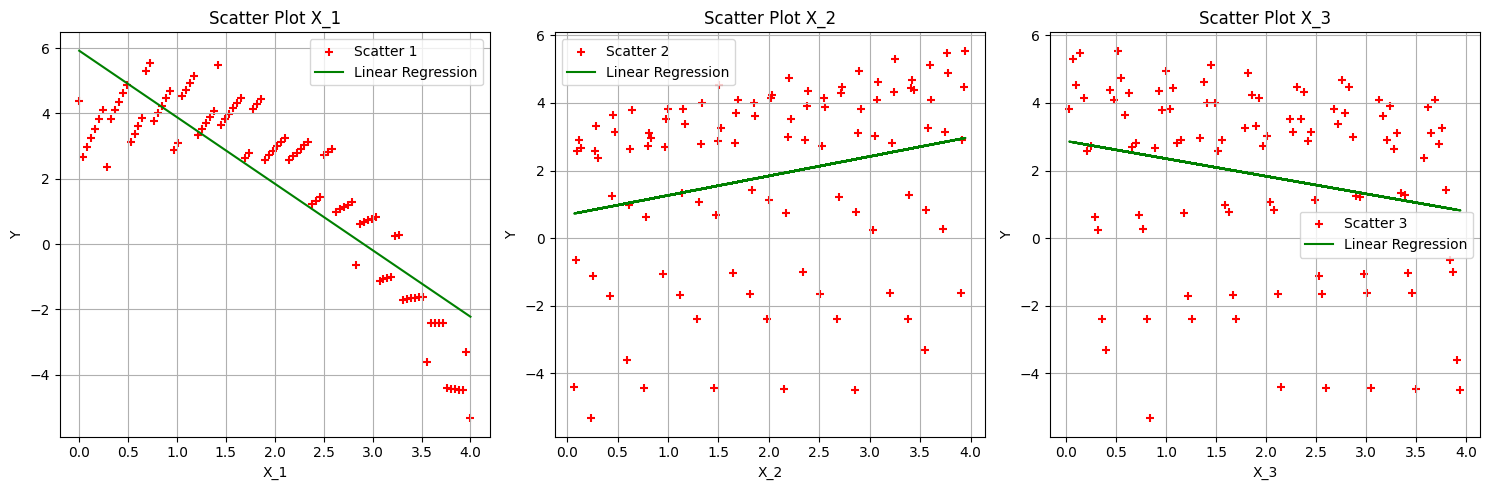

In [62]:
# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
#plt.scatter(X_01[:, 1], Y, color='red', marker='+', label='Training Data')

# Line plot for the linear regression model
#plt.plot(X_01[:, 1], X_01.dot(theta), color='green', label='Linear Regression')

# Plot customizations
#plt.rcParams["figure.figsize"] = (10, 6)
#plt.grid(True)
#plt.xlabel('X_01')
#plt.ylabel('Y')
#plt.title('Linear Regression Fit')
#plt.legend()

# Show the plot
#plt.show()

# Create a figure with three subplots in a single row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Plot the first scatter plot on the first subplot
ax1.scatter(X_1, Y,color="red", marker='+', label='Scatter 1')
ax1.plot(X_01[:, 1], X_01.dot(theta_01), color='green', label='Linear Regression')
ax1.set_title('Scatter Plot X_1')
ax1.set_xlabel('X_1')
ax1.set_ylabel('Y')
ax1.grid(True)
ax1.legend()

# Plot the first scatter plot on the first subplot
ax2.scatter(X_2, Y,color="red", marker='+', label='Scatter 2')
ax2.plot(X_02[:, 1], X_02.dot(theta_02), color='green', label='Linear Regression')
ax2.set_title('Scatter Plot X_2')
ax2.set_xlabel('X_2')
ax2.set_ylabel('Y')
ax2.grid(True)
ax2.legend()

# Plot the first scatter plot on the first subplot
ax3.scatter(X_3, Y,color="red", marker='+', label='Scatter 3')
ax3.plot(X_03[:, 1], X_03.dot(theta_03), color='green', label='Linear Regression')
ax3.set_title('Scatter Plot X_3')
ax3.set_xlabel('X_3')
ax3.set_ylabel('Y')
ax3.grid(True)
ax3.legend()
# Optionally, adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

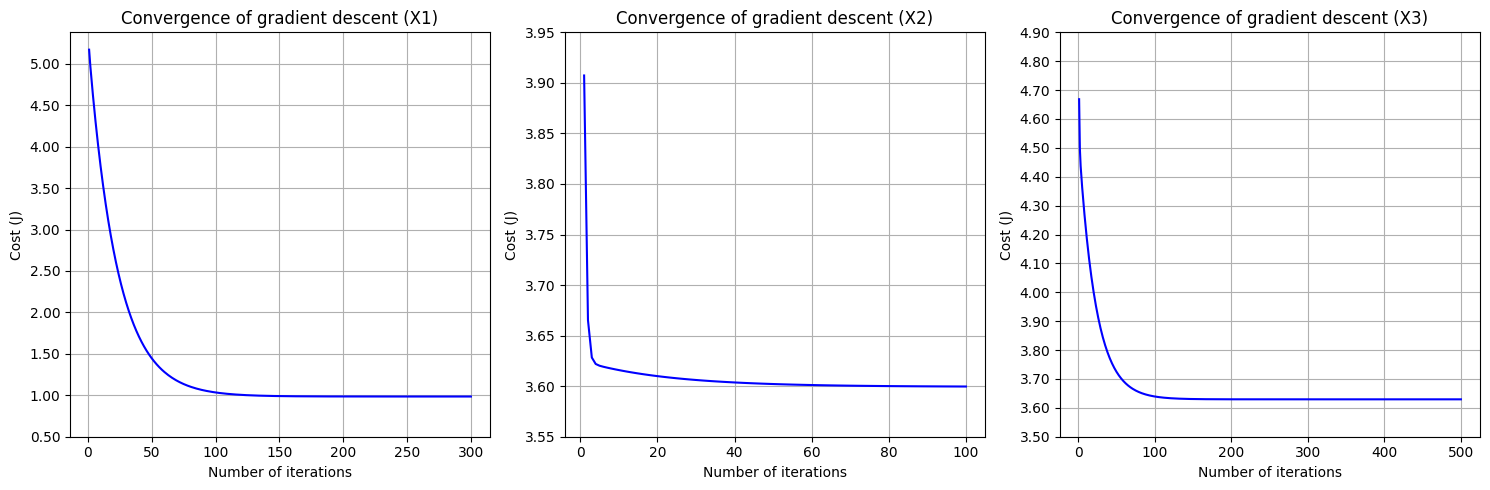

In [63]:
#plt.plot(range(1, iterations + 1), cost_history, color='blue')
#plt.rcParams["figure.figsize"] = (10, 6)
#plt.grid(True)

#plt.xlabel('Number of iterations')
#plt.ylabel('Cost (J)')
#plt.title('Convergence of gradient descent')

# Show the plot
#plt.show()

# Create a figure with three subplots in a single row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed


# Plot the first scatter plot on the first subplot
ax1.plot(range(1, iterations_01 + 1), cost_history_01, color='blue')
ax1.set_title('Convergence of gradient descent (X1)')
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost (J)')
tick_values = np.arange(0.5, 5.5, 0.5)  # Customize these values as needed
tick_labels = [f'{val:.2f}' for val in tick_values]  # Customize label format as needed

# Set the tick locations and labels for the y-axis
ax1.set_yticks(tick_values, tick_labels)
ax1.grid(True)
#ax1.legend()

# Plot the first scatter plot on the first subplot
ax2.plot(range(1, iterations_02 + 1), cost_history_02, color='blue')
ax2.set_title('Convergence of gradient descent (X2)')
ax2.set_xlabel('Number of iterations')
ax2.set_ylabel('Cost (J)')
tick_values = np.arange(3.55, 3.95, 0.05)  # Customize these values as needed
tick_labels = [f'{val:.2f}' for val in tick_values]  # Customize label format as needed

# Set the tick locations and labels for the y-axis
ax2.set_yticks(tick_values, tick_labels)
ax2.grid(True)
#ax2.legend()

# Plot the first scatter plot on the first subplot
ax3.plot(range(1, iterations_03 + 1), cost_history_03, color='blue')
ax3.set_title('Convergence of gradient descent (X3)')
ax3.set_xlabel('Number of iterations')
ax3.set_ylabel('Cost (J)')
tick_values = np.arange(3.5, 5, 0.1)  # Customize these values as needed
tick_labels = [f'{val:.2f}' for val in tick_values]  # Customize label format as needed

# Set the tick locations and labels for the y-axis
ax3.set_yticks(tick_values, tick_labels)
ax3.grid(True)
#ax3.legend()
# Optionally, adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()